<a href="https://colab.research.google.com/github/Thulayb2021/final_year_project_thulayb/blob/main/w1905642_20211252_Thulayb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans

In [2]:
obesity_data = pd.read_csv('/content/drive/MyDrive/ObesityDataSet_raw_and_data_sinthetic.csv')

# **Data Preprocessing & Exploratory Data Analysis**  

In [3]:
obesity_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [4]:
# Checking for Missing Values

obesity_data.isna().sum()

,0
Gender,0
Age,0
Height,0
Weight,0
family_history_with_overweight,0
FAVC,0
FCVC,0
NCP,0
CAEC,0
SMOKE,0


In [5]:
#Summary Statistics

obesity_data.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [6]:
#Removal of Target Variable

target_column = 'NObeyesdad'
features_data = obesity_data.drop(columns=[target_column])

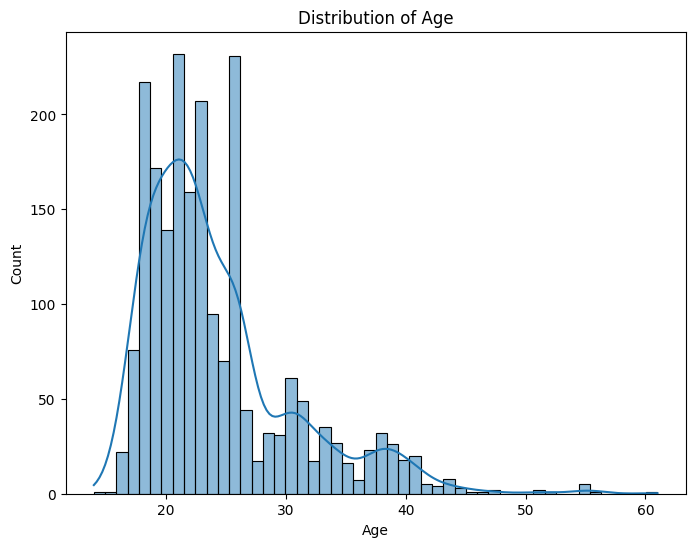

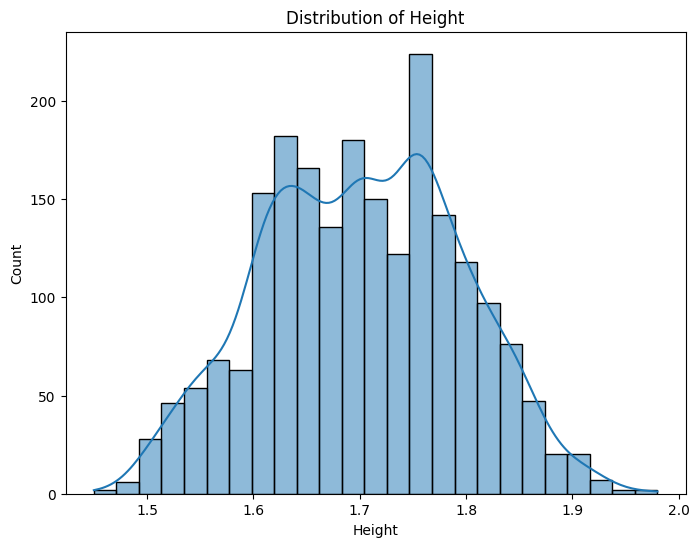

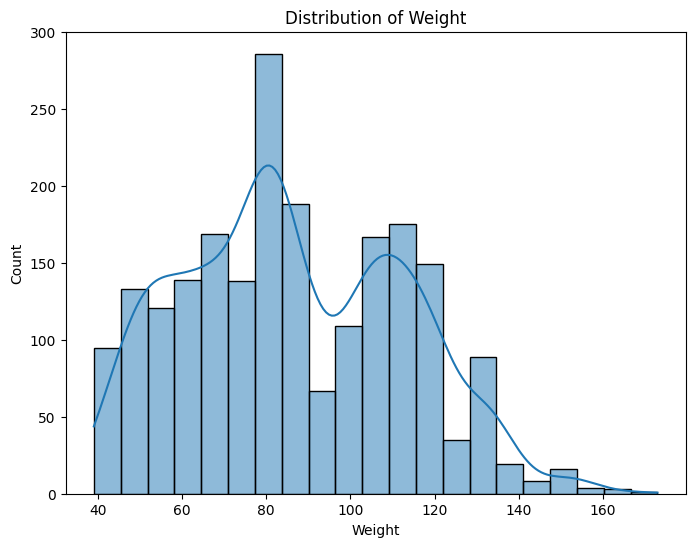

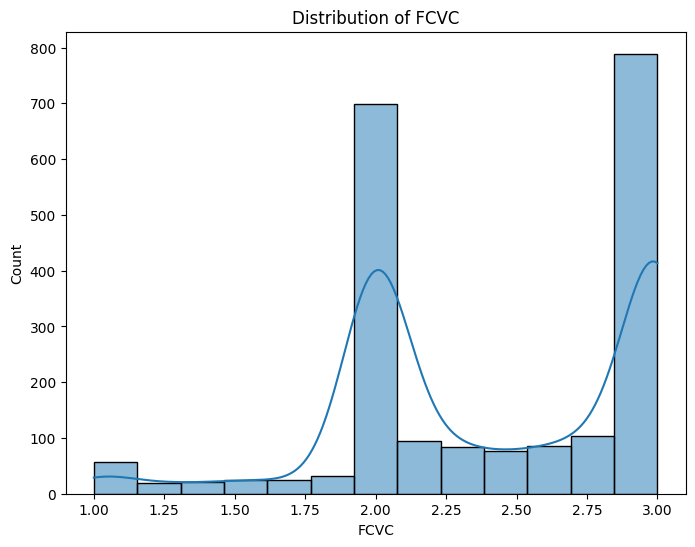

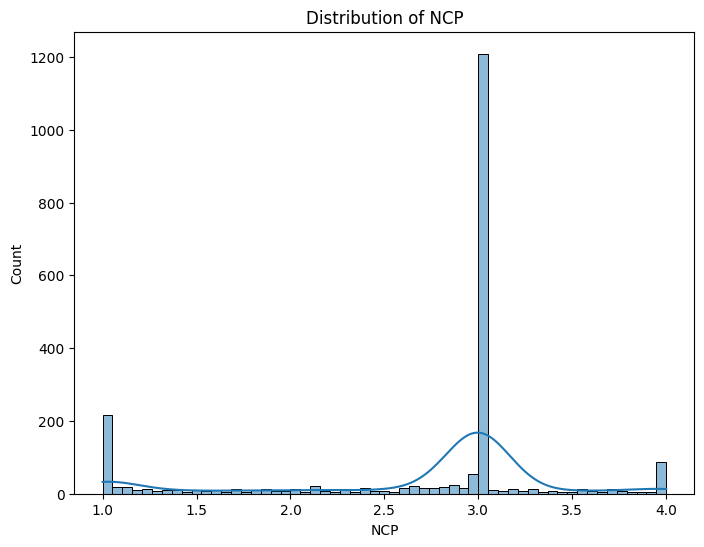

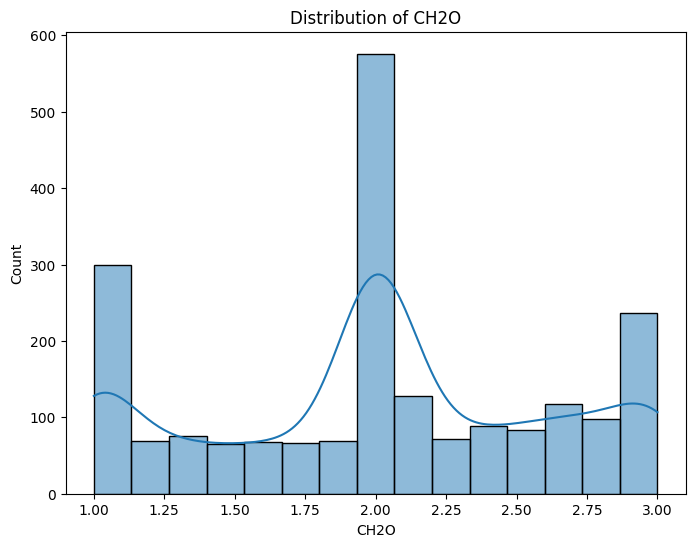

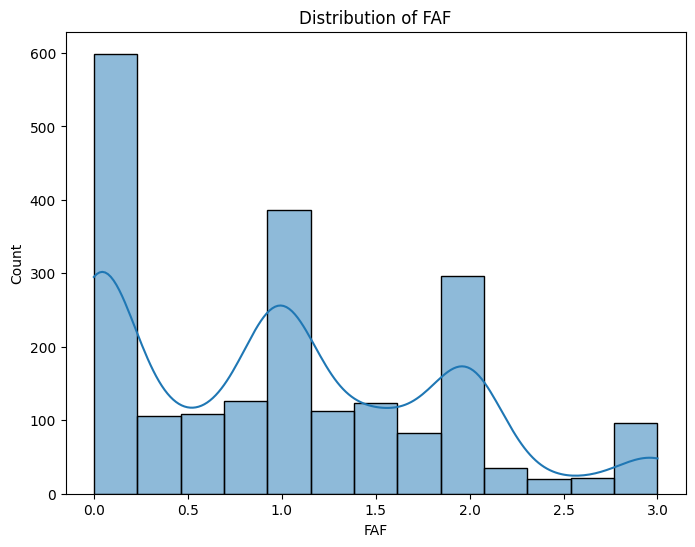

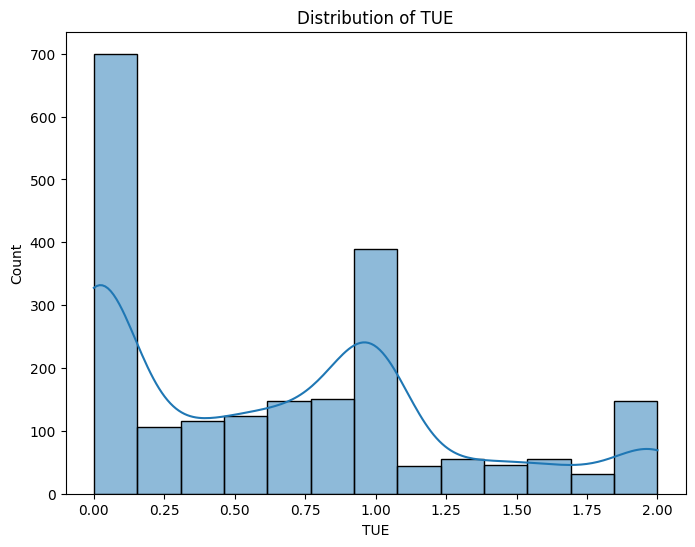

In [7]:
#Exploration of Numerical Variables

numeric_cols = features_data.select_dtypes(include=['float64', 'int64']).columns

for col in numeric_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(obesity_data[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)

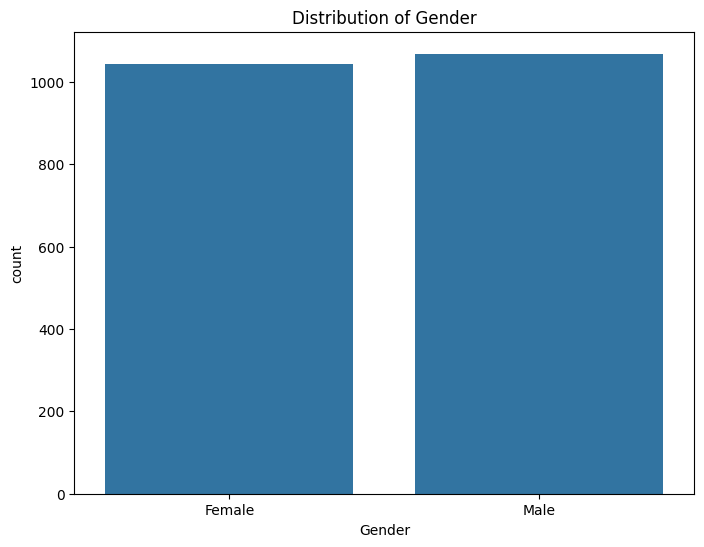

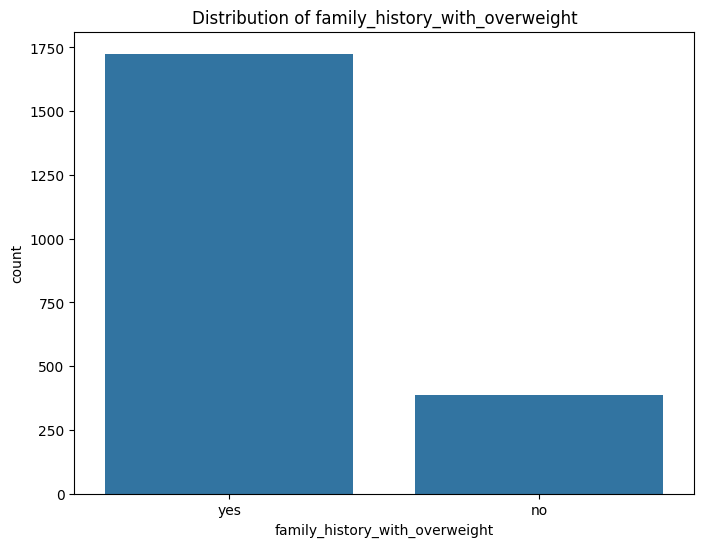

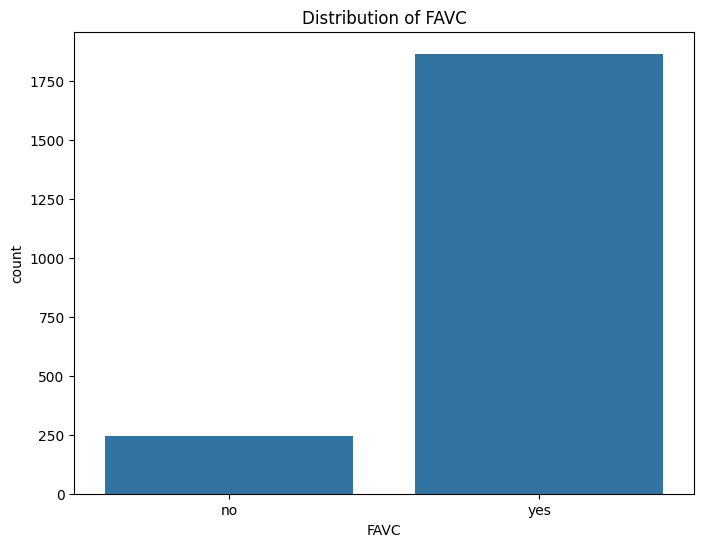

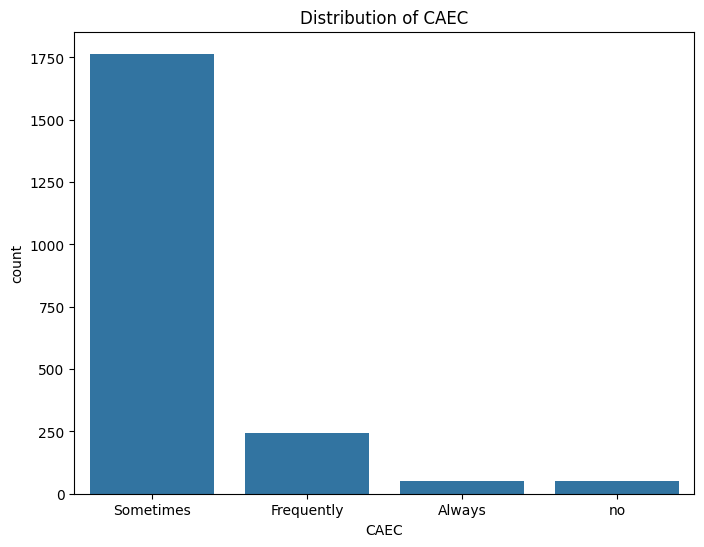

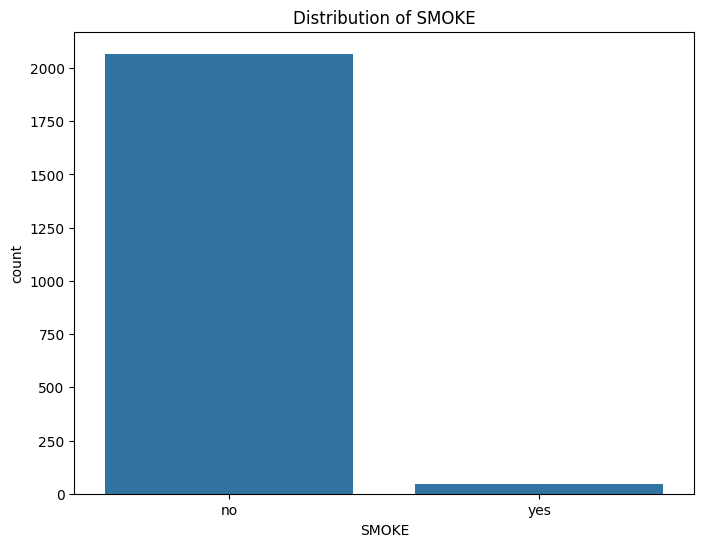

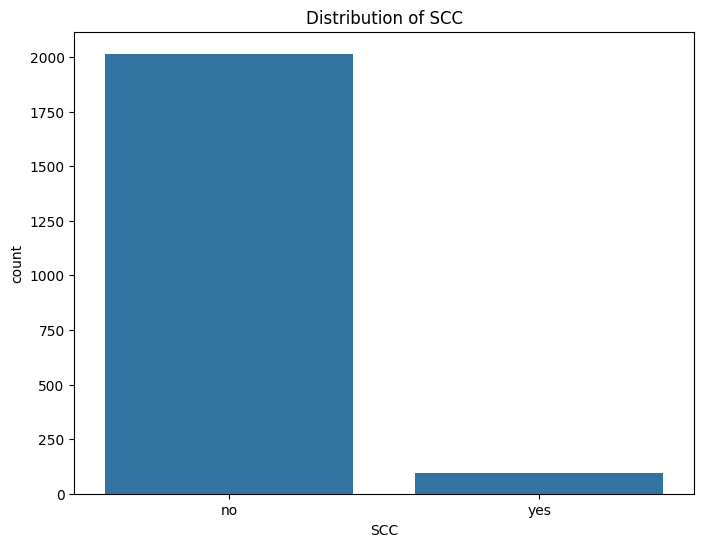

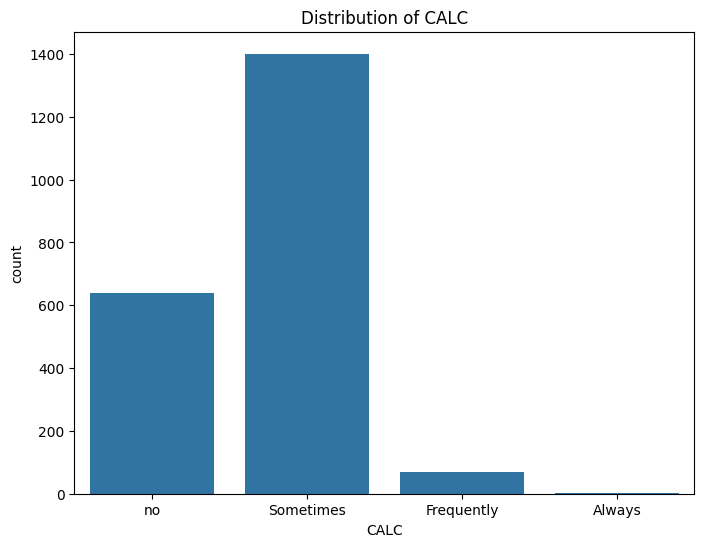

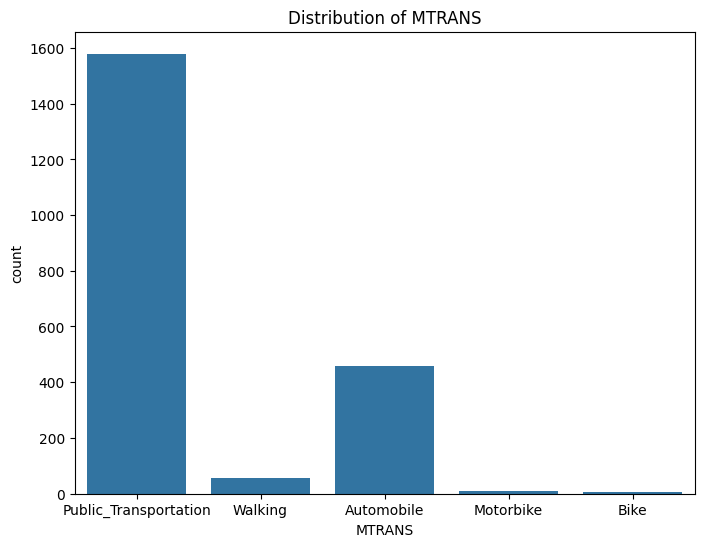

In [8]:
#Exploration of Categorical Variables

categorical_cols = features_data.select_dtypes(include=['object']).columns

for col in categorical_cols:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=obesity_data, x=col)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)

In [9]:
# One-Hot Encoding for Categorical Variables

encoder = OneHotEncoder(drop='first', sparse_output = False)
encoded_categorical_data = encoder.fit_transform(features_data[categorical_cols])
encoded_categorical_df = pd.DataFrame(encoded_categorical_data, columns=encoder.get_feature_names_out(categorical_cols))

In [10]:
# Concatenating Numerical Variables

encoded_data = pd.concat([features_data[numeric_cols].reset_index(drop=True), encoded_categorical_df], axis=1)


In [11]:
encoded_data.head()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Male,family_history_with_overweight_yes,...,CAEC_no,SMOKE_yes,SCC_yes,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,21.0,1.62,64.0,2.0,3.0,2.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,21.0,1.52,56.0,3.0,3.0,3.0,3.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,23.0,1.80,77.0,2.0,3.0,2.0,2.0,1.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,27.0,1.80,87.0,3.0,3.0,2.0,2.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,22.0,1.78,89.8,2.0,1.0,2.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [12]:
encoded_data.isna().sum()

,0
Age,0
Height,0
Weight,0
FCVC,0
NCP,0
CH2O,0
FAF,0
TUE,0
Gender_Male,0
family_history_with_overweight_yes,0


In [13]:
#Scaling Numerical Values

scaler = StandardScaler()
scaled_data = scaler.fit_transform(encoded_data)

In [14]:
#Handles Different Scales Effectively: StandardScaler ensures all features have a mean of 0 and a standard deviation of 1, making them comparable.
#Works Well for Clustering (K-Means): If features are not standardized, variables with larger values (e.g., weight) will dominate the clustering process.

In [15]:
# Determination for the number of clusters

from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer


k_values = range(2, 11)


inertia_values = []
silhouette_scores = []


for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(scaled_data)


    #Elbow Method
    inertia_values.append(kmeans.inertia_)

    #Silhouette Score
    silhouette_scores.append(silhouette_score(scaled_data, cluster_labels))


In [16]:
scaled_data

array([[-0.52212439, -0.87558934, -0.86255819, ..., -0.07237469,
         0.57972058, -0.16507758],
       [-0.52212439, -1.94759928, -1.16807699, ..., -0.07237469,
         0.57972058, -0.16507758],
       [-0.20688898,  1.05402854, -0.36609013, ..., -0.07237469,
         0.57972058, -0.16507758],
       ...,
       [-0.28190933,  0.54167211,  1.79886776, ..., -0.07237469,
         0.57972058, -0.16507758],
       [ 0.00777624,  0.40492652,  1.78577968, ..., -0.07237469,
         0.57972058, -0.16507758],
       [-0.10211908,  0.39834438,  1.7905916 , ..., -0.07237469,
         0.57972058, -0.16507758]])

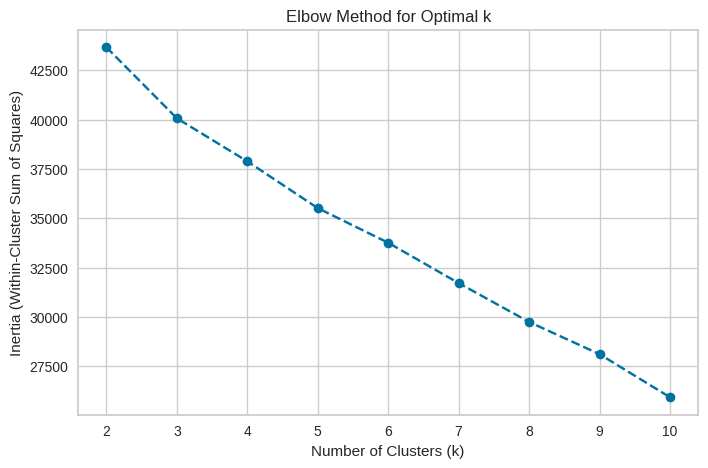

In [17]:
#Elbow Method Plot
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia_values, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.title('Elbow Method for Optimal k')
plt.show()

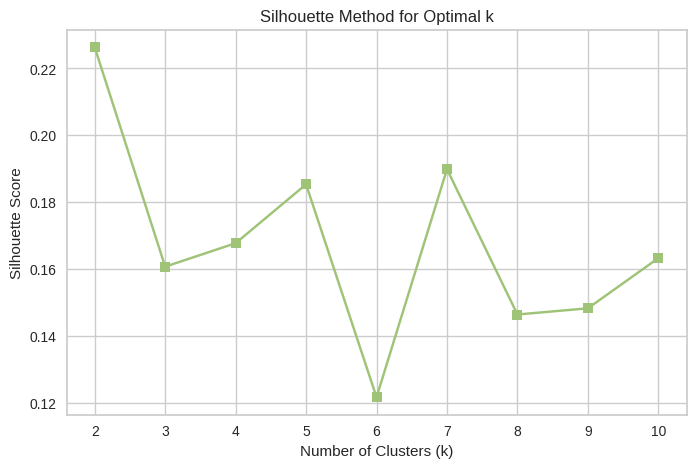

In [18]:
#Silhouette Score Method Plot

plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, marker='s', linestyle='-', color='g')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method for Optimal k')
plt.show()

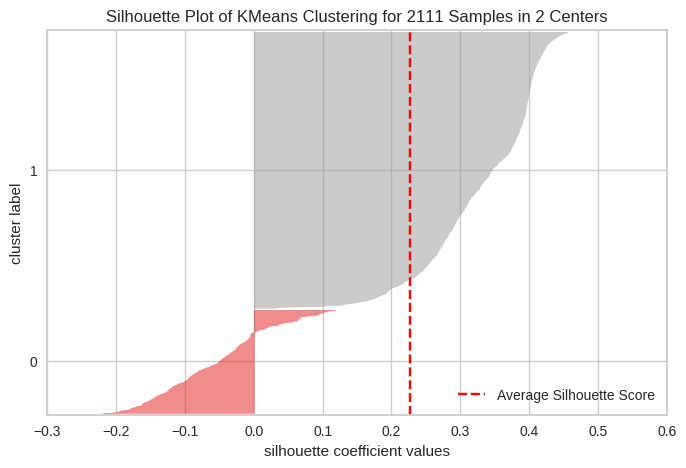

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 2111 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [19]:
# Visualizing Silhouette Analysis for the best k (highest silhouette score)

optimal_k = k_values[silhouette_scores.index(max(silhouette_scores))]

plt.figure(figsize=(8, 5))
visualizer = SilhouetteVisualizer(KMeans(n_clusters=optimal_k, random_state=42, n_init=10))
visualizer.fit(scaled_data)
visualizer.show()

In [20]:

#K-means clustering
optimal_k = 2
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(scaled_data)

# Convert scaled_data to a pandas DataFrame & adding back column labels after scaling
scaled_df = pd.DataFrame(scaled_data, columns= encoded_data.columns)

# Adding Cluster Labels to the DataFrame
scaled_df['Cluster_Labels'] = cluster_labels


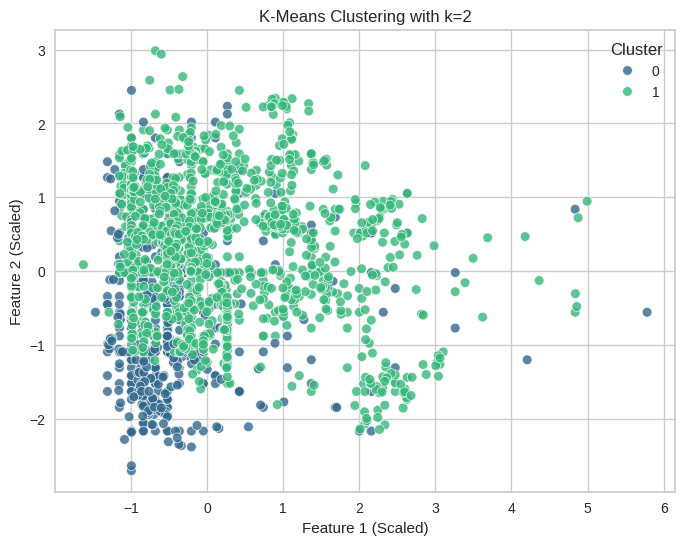

In [21]:
# Visualize the clusters using the first two principal components
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=scaled_data[:, 0],
    y=scaled_data[:, 1],
    hue=cluster_labels,
    palette='viridis',
    alpha=0.8
)
plt.xlabel('Feature 1 (Scaled)')
plt.ylabel('Feature 2 (Scaled)')
plt.title('K-Means Clustering with k=2')
plt.legend(title="Cluster")
plt.show()

In [22]:
scaled_df.head()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Male,family_history_with_overweight_yes,...,SMOKE_yes,SCC_yes,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,Cluster_Labels
0,-0.522124,-0.875589,-0.862558,-0.785019,0.404153,-0.013073,-1.188039,0.561997,-1.011914,0.472291,...,-0.145900,-0.218272,-0.185194,-1.404720,1.517761,-0.05768,-0.072375,0.579721,-0.165078,0
1,-0.522124,-1.947599,-1.168077,1.088342,0.404153,1.618759,2.339750,-1.080625,-1.011914,0.472291,...,6.853997,4.581439,-0.185194,0.711885,-0.658865,-0.05768,-0.072375,0.579721,-0.165078,0
2,-0.206889,1.054029,-0.366090,-0.785019,0.404153,-0.013073,1.163820,0.561997,0.988227,0.472291,...,-0.145900,-0.218272,5.399735,-1.404720,-0.658865,-0.05768,-0.072375,0.579721,-0.165078,1
3,0.423582,1.054029,0.015808,1.088342,0.404153,-0.013073,1.163820,-1.080625,0.988227,-2.117337,...,-0.145900,-0.218272,5.399735,-1.404720,-0.658865,-0.05768,-0.072375,-1.724969,6.057758,0
4,-0.364507,0.839627,0.122740,-0.785019,-2.167023,-0.013073,-1.188039,-1.080625,0.988227,-2.117337,...,-0.145900,-0.218272,-0.185194,0.711885,-0.658865,-0.05768,-0.072375,0.579721,-0.165078,1


In [23]:
print("Features used for K-Means clustering:")
print(encoded_data.columns.tolist())  # Lists all features used before scaling

Features used for K-Means clustering:
['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE', 'Gender_Male', 'family_history_with_overweight_yes', 'FAVC_yes', 'CAEC_Frequently', 'CAEC_Sometimes', 'CAEC_no', 'SMOKE_yes', 'SCC_yes', 'CALC_Frequently', 'CALC_Sometimes', 'CALC_no', 'MTRANS_Bike', 'MTRANS_Motorbike', 'MTRANS_Public_Transportation', 'MTRANS_Walking']


In [24]:
cluster_centroids = pd.DataFrame(kmeans.cluster_centers_, columns=encoded_data.columns)
print("Cluster centroids:")
print(cluster_centroids)

Cluster centroids:
        Age    Height    Weight      FCVC       NCP      CH2O       FAF  \
0 -0.445972 -0.610375 -1.034189 -0.073214 -0.078863 -0.263553  0.125539   
1  0.167348  0.229040  0.388074  0.027473  0.029593  0.098897 -0.047108   

        TUE  Gender_Male  family_history_with_overweight_yes  ...   CAEC_no  \
0  0.070093    -0.397287                           -1.056309  ...  0.408005   
1 -0.026302     0.149080                            0.396374  ... -0.153102   

   SMOKE_yes   SCC_yes  CALC_Frequently  CALC_Sometimes   CALC_no  \
0   0.072847  0.540016         0.066903       -0.225154  0.202716   
1  -0.027335 -0.202638        -0.025105        0.084488 -0.076068   

   MTRANS_Bike  MTRANS_Motorbike  MTRANS_Public_Transportation  MTRANS_Walking  
0     0.002718          0.144647                      0.179601         0.25626  
1    -0.001020         -0.054278                     -0.067394        -0.09616  

[2 rows x 23 columns]


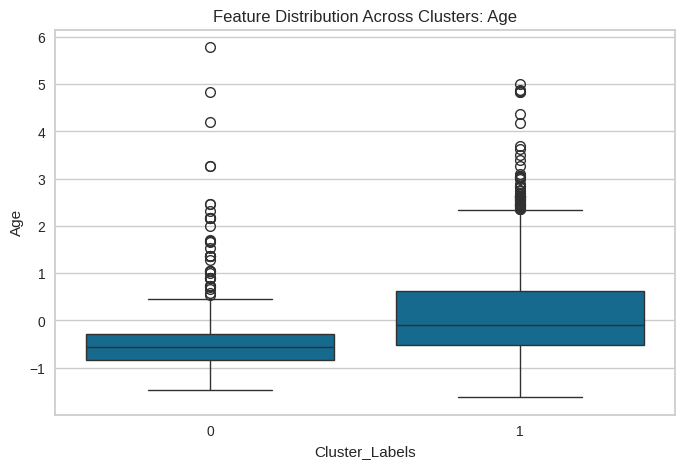

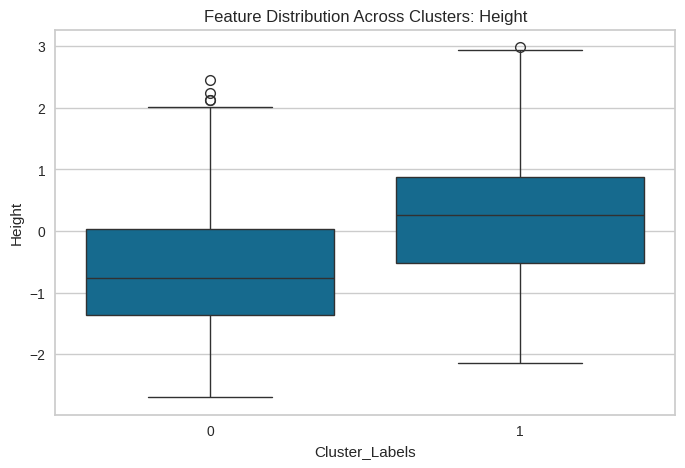

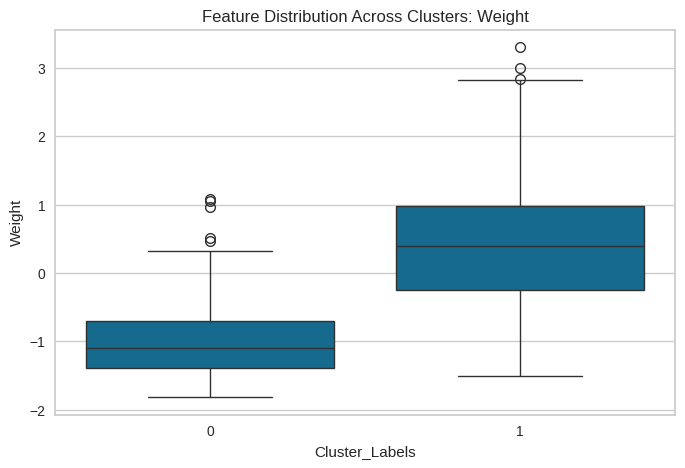

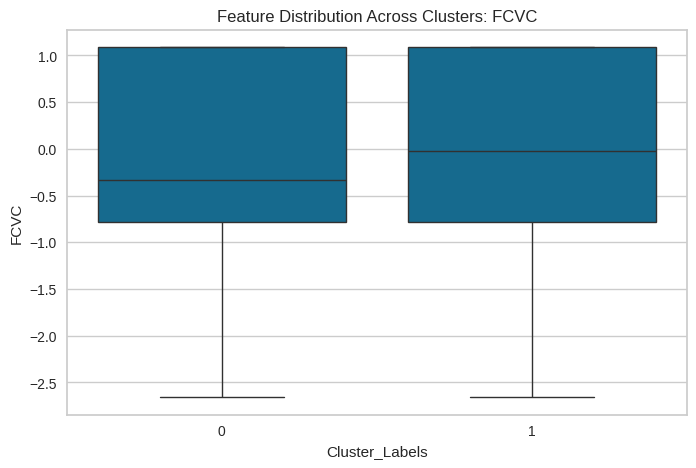

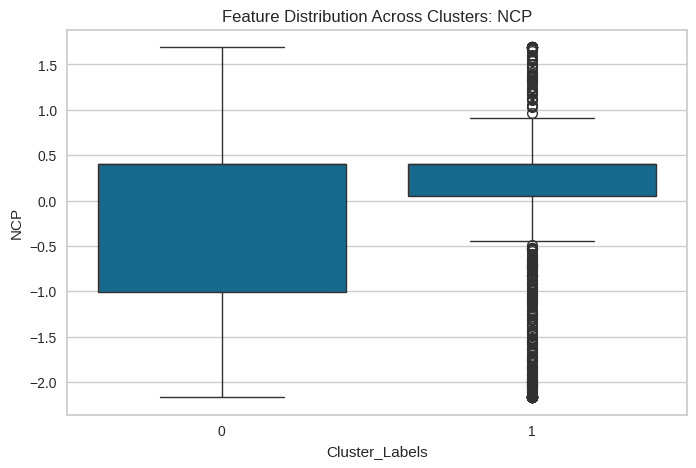

In [25]:
for feature in encoded_data.columns[:5]:  # Check first 5 features
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=scaled_df['Cluster_Labels'], y=scaled_df[feature])
    plt.title(f'Feature Distribution Across Clusters: {feature}')
    plt.show()